
# Project: Investigate a Soccer Statistics


## Project Summary

This project will be analysing soccer data that involves players, matches, teams, player and player attributes, countries to answer the following questions.

1. How many matches were played at home and away respectively?
2. What are the different categories of player attributes?
    1. Which was best rating in eacg attribute?
    2. Which was worst rating in each attribute?
    3. Which player(s) has the best rating in eacg attribute?
    4. Which player(s) has the worst rating in each attribute?
3. How old are the players?
    1. How old is the oldest player?
    2. How old is the youngest player?
    3. How many players are below 20 years?
    4. How many players are between 20 and 30 years?
    5. How many players are between 30 and 40 years?
    6. How many players are above 30 years?

4. Goals scored?
    1. What were all the matches that were played at home and how did each team perform?
    2. What were all the matches that were played away and how did each team perform?
    3. How many goals were scored home?
    4. How many goals were scored away?
    5. What was each team's most scored goals for a match?
    6. What was each team's less scored goals for a match?
    7. What team(s) scored more goals?
    8. What team(s) scored less goals?
    9. How many goals(Home and Away) did each team score per season

5. How teams faired against each other
    1. Which teams won home games?
    2. Which teams won away games?
    3. How did the team play against other teams per season?

6. How many and what categories of seasons are there?

7. How many and what categories of stages are there?


In [378]:
# IMPORT PACKAGES
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sqlite3
from datetime import datetime, date

In [259]:
# CONNEC TO DATABASE

conn = sqlite3.connect('database.sqlite')
c = conn.cursor()

In [260]:
# CREATE CSV'S

df_players = pd.read_sql('SELECT * from Player', conn)
df_teams = pd.read_sql('SELECT * from Team', conn)
df_country = pd.read_sql('SELECT * from Country', conn)
df_league = pd.read_sql('SELECT * from League', conn)

In [261]:
#  SAVE TO CSV
df_players.to_csv('players.csv', index=False)
df_teams.to_csv('teams.csv', index=False)
df_country.to_csv('countries.csv', index=False)
df_league.to_csv('leagues.csv', index=False)

In [262]:
# LOAD DATA

df_all_players = pd.read_csv('players.csv')
df_all_teams = pd.read_csv('teams.csv')
df_all_country = pd.read_csv('countries.csv')
df_all_league = pd.read_csv('leagues.csv')

In [263]:
print(df_all_players.describe())
df_all_players.head()

                 id  player_api_id  player_fifa_api_id        height  \
count  11060.000000   11060.000000        11060.000000  11060.000000   
mean    5537.511392  156582.427215       165664.910488    181.867445   
std     3197.692647  160713.700624        58649.928360      6.369201   
min        1.000000    2625.000000            2.000000    157.480000   
25%     2767.750000   35555.500000       151889.500000    177.800000   
50%     5536.500000   96619.500000       184671.000000    182.880000   
75%     8306.250000  212470.500000       203883.250000    185.420000   
max    11075.000000  750584.000000       234141.000000    208.280000   

             weight  
count  11060.000000  
mean     168.380289  
std       14.990217  
min      117.000000  
25%      159.000000  
50%      168.000000  
75%      179.000000  
max      243.000000  


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [264]:
df_all_teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [265]:
df_all_country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [266]:
df_all_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [267]:
# Country Leagues
df_country_league = pd.read_sql(f"SELECT League.name, Country.name FROM League LEFT JOIN Country ON League.country_id = Country.id WHERE League.country_id != ''", conn)
df_country_league.to_csv('countryleague.csv', index=False)

df_leaguee = pd.read_csv('countryleague.csv')
df_leaguee.columns = ['league_name', 'country']
df_leaguee.head()

,league_name,country
0,Belgium Jupiler League,Belgium
1,England Premier League,England
2,France Ligue 1,France
3,Germany 1. Bundesliga,Germany
4,Italy Serie A,Italy


In [268]:
#  TEAMS DATA

df_teams_info = pd.read_sql(f"SELECT * FROM Team LEFT JOIN Team_Attributes ON Team.team_api_id = Team_Attributes.team_api_id WHERE Team.team_api_id != ''", conn)
df_teams_info.to_csv('teams_info.csv', index=False)

df_teams_info = pd.read_csv('teams_info.csv')
df_teams_info.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name,id.1,team_fifa_api_id.1,team_api_id.1,date,buildUpPlaySpeed,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,9987,673.0,KRC Genk,GEN,485.0,673.0,9987.0,2010-02-22 00:00:00,45.0,...,60.0,Normal,Organised,70.0,High,65.0,Press,70.0,Wide,Cover
1,1,9987,673.0,KRC Genk,GEN,486.0,673.0,9987.0,2011-02-22 00:00:00,66.0,...,51.0,Normal,Organised,48.0,Medium,47.0,Press,54.0,Normal,Offside Trap
2,1,9987,673.0,KRC Genk,GEN,487.0,673.0,9987.0,2012-02-22 00:00:00,53.0,...,56.0,Normal,Organised,47.0,Medium,45.0,Press,55.0,Normal,Cover
3,1,9987,673.0,KRC Genk,GEN,488.0,673.0,9987.0,2013-09-20 00:00:00,58.0,...,56.0,Normal,Organised,47.0,Medium,45.0,Press,55.0,Normal,Cover
4,1,9987,673.0,KRC Genk,GEN,489.0,673.0,9987.0,2014-09-19 00:00:00,58.0,...,56.0,Normal,Organised,47.0,Medium,45.0,Press,55.0,Normal,Cover


In [269]:
df_all_players = pd.read_sql(f"SELECT * FROM Player LEFT JOIN Player_Attributes ON Player.player_api_id = Player_Attributes.player_api_id WHERE Player.player_api_id != ''", conn)
df_all_players.to_csv('all_players.csv', index=False)

# How many matches were played at home?

In [270]:
# HOME TEAM MATCHES

df_home_matches = pd.read_sql(f"SELECT t.team_long_name as home_team, m.season, m.stage, m.date,  m.home_team_goal  FROM Team t JOIN Match m ON t.team_api_id = m.home_team_api_id", conn)

df_home_matches.to_csv('home_team_matches.csv', index=False)


In [271]:
df_home_matches_summary = pd.read_csv('home_team_matches.csv')
df_home_matches_summary.describe()

,stage,home_team_goal
count,25979.000000,25979.000000
mean,18.242773,1.544594
std,10.407354,1.297158
min,1.000000,0.000000
25%,9.000000,1.000000
50%,18.000000,1.000000
75%,27.000000,2.000000
max,38.000000,10.000000


In [272]:
len(df_home_matches_summary.index)

25979

# How many matches were played at away?

In [273]:
# Aay team matches

df_away_matches = pd.read_sql(f"SELECT t.team_long_name as away_team, m.season, m.stage, m.date,  m.away_team_goal  FROM Team t JOIN Match m ON t.team_api_id = m.away_team_api_id", conn)

df_away_matches.to_csv('away_team_matches.csv', index=False)

In [274]:
df_away_matches_summary = pd.read_csv('away_team_matches.csv')
df_away_matches_summary.describe()

,stage,away_team_goal
count,25979.000000,25979.000000
mean,18.242773,1.160938
std,10.407354,1.142110
min,1.000000,0.000000
25%,9.000000,0.000000
50%,18.000000,1.000000
75%,27.000000,2.000000
max,38.000000,9.000000


In [275]:
len(df_away_matches_summary.index)

25979

In [276]:
# LOAD PLAYERS
df_total_players = pd.read_csv('all_players.csv')
df_total_players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id.1,player_fifa_api_id.1,player_api_id.1,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,505942,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [277]:
df_away_matches_summary = pd.read_csv('away_team_matches.csv')
df_away_matches_summary .count()

away_team         25979
season            25979
stage             25979
date              25979
away_team_goal    25979
dtype: int64

In [278]:
# remove duplicate columns
df_players_copy = df_total_players.loc[~df_total_players.index.duplicated(),:].copy()

df_players_new = df_players_copy.drop_duplicates(subset=['player_name'], keep='first')

df_players_new.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id.1,player_fifa_api_id.1,player_api_id.1,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,38,189615,155782,...,38.0,29.0,53.0,45.0,63.0,6.0,22.0,49.0,22.0,22.0
38,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,64,186170,162549,...,67.0,36.0,21.0,21.0,21.0,8.0,21.0,54.0,21.0,21.0
64,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,87,140161,30572,...,54.0,60.0,72.0,70.0,70.0,14.0,11.0,58.0,11.0,10.0
87,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,112,17725,23780,...,60.0,81.0,74.0,79.0,77.0,12.0,11.0,55.0,10.0,6.0


In [279]:
df_players_categories = df_players_new.drop(df_players_copy.columns[[0, 1, 2, 3, 4,  7, 8, 9, 10,  13, 14, 15]], axis=1)

df_players_new = df_players_new.drop(df_players_copy.columns[[0, 1, 3, 4,  7, 8, 9, 10,  13, 14, 15]], axis=1)

categories = df_players_categories.columns.values.tolist()
categories = np.array(categories)
print(categories)

['height' 'weight' 'overall_rating' 'potential' 'crossing' 'finishing'
 'heading_accuracy' 'short_passing' 'volleys' 'dribbling' 'curve'
 'free_kick_accuracy' 'long_passing' 'ball_control' 'acceleration'
 'sprint_speed' 'agility' 'reactions' 'balance' 'shot_power' 'jumping'
 'stamina' 'strength' 'long_shots' 'aggression' 'interceptions'
 'positioning' 'vision' 'penalties' 'marking' 'standing_tackle'
 'sliding_tackle' 'gk_diving' 'gk_handling' 'gk_kicking' 'gk_positioning'
 'gk_reflexes']


In [280]:
# Max per category
def max_rating(category):
    max_rating_category = df_players_new[category].max()
    print(f"Best rating for category {category} is {max_rating_category}")
    return max_rating_category

In [281]:
best_rating = lambda : [max_rating(category) for category in categories]
best_rating()

Best rating for category height is 208.28
Best rating for category weight is 243
Best rating for category overall_rating is 93.0
Best rating for category potential is 95.0
Best rating for category crossing is 95.0
Best rating for category finishing is 95.0
Best rating for category heading_accuracy is 94.0
Best rating for category short_passing is 94.0
Best rating for category volleys is 91.0
Best rating for category dribbling is 97.0
Best rating for category curve is 92.0
Best rating for category free_kick_accuracy is 94.0
Best rating for category long_passing is 94.0
Best rating for category ball_control is 97.0
Best rating for category acceleration is 96.0
Best rating for category sprint_speed is 96.0
Best rating for category agility is 96.0
Best rating for category reactions is 96.0
Best rating for category balance is 95.0
Best rating for category shot_power is 97.0
Best rating for category jumping is 94.0
Best rating for category stamina is 95.0
Best rating for category strength is

[208.28,
 243,
 93.0,
 95.0,
 95.0,
 95.0,
 94.0,
 94.0,
 91.0,
 97.0,
 92.0,
 94.0,
 94.0,
 97.0,
 96.0,
 96.0,
 96.0,
 96.0,
 95.0,
 97.0,
 94.0,
 95.0,
 96.0,
 94.0,
 97.0,
 96.0,
 95.0,
 96.0,
 94.0,
 96.0,
 95.0,
 94.0,
 93.0,
 93.0,
 94.0,
 96.0,
 94.0]

### What is the worst rating for each of the player attributes?

In [282]:
# Min per category
def min_rating(category):
    min_rating_category = df_players_new[category].min()
    print(f"Worst rating for category {category} is {min_rating_category}")
    return min_rating_category

In [283]:
worst_rating = lambda : [min_rating(category) for category in categories]
worst_rating()

Worst rating for category height is 157.48
Worst rating for category weight is 117
Worst rating for category overall_rating is 33.0
Worst rating for category potential is 39.0
Worst rating for category crossing is 2.0
Worst rating for category finishing is 1.0
Worst rating for category heading_accuracy is 1.0
Worst rating for category short_passing is 3.0
Worst rating for category volleys is 1.0
Worst rating for category dribbling is 1.0
Worst rating for category curve is 4.0
Worst rating for category free_kick_accuracy is 1.0
Worst rating for category long_passing is 4.0
Worst rating for category ball_control is 5.0
Worst rating for category acceleration is 10.0
Worst rating for category sprint_speed is 13.0
Worst rating for category agility is 15.0
Worst rating for category reactions is 20.0
Worst rating for category balance is 20.0
Worst rating for category shot_power is 2.0
Worst rating for category jumping is 14.0
Worst rating for category stamina is 16.0
Worst rating for category

[157.48,
 117,
 33.0,
 39.0,
 2.0,
 1.0,
 1.0,
 3.0,
 1.0,
 1.0,
 4.0,
 1.0,
 4.0,
 5.0,
 10.0,
 13.0,
 15.0,
 20.0,
 20.0,
 2.0,
 14.0,
 16.0,
 16.0,
 1.0,
 9.0,
 1.0,
 4.0,
 1.0,
 3.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 3.0,
 1.0,
 1.0]

### Who is the best player for each category?

In [284]:
# BEST PLAYER
def best_player_category(category):
    best_player = df_players_new[df_players_new[category]== df_players_new[category].max()]
    best_player_names = best_player['player_name']
    print(f"Best player for category {category} is/are {np.array(best_player_names)}")
    return best_player

In [285]:
best_player = lambda : [best_player_category(category) for category in categories]
best_player()

Best player for category height is/are ['Kristof van Hout']
Best player for category weight is/are ['Kristof van Hout' 'Tim Wiese']
Best player for category overall_rating is/are ['Gianluigi Buffon' 'Wayne Rooney']
Best player for category potential is/are ['Ronaldinho']
Best player for category crossing is/are ['David Beckham']
Best player for category finishing is/are ['Luca Toni' 'Thierry Henry']
Best player for category heading_accuracy is/are ['Claudio Pizarro' 'Hernan Crespo' 'Luca Toni']
Best player for category short_passing is/are ['Fabio Liverani' 'Juan Carlos Valeron' 'Juninho Pernambucano,20'
 'Tomas Rosicky']
Best player for category volleys is/are ['Dimitar Berbatov' 'Lukas Podolski']
Best player for category dribbling is/are ['Ronaldinho']
Best player for category curve is/are ['David Beckham']
Best player for category free_kick_accuracy is/are ['Fabio Cannavaro' 'Iker Casillas' 'Paolo Maldini' 'Roy Makaay']
Best player for category long_passing is/are ['David Beckham']


[            player_name  height  weight  overall_rating  potential  crossing  \
 98021  Kristof van Hout  208.28     243            47.0       62.0      21.0   
 
        finishing  heading_accuracy  short_passing  volleys  ...  vision  \
 98021       21.0              21.0           29.0     11.0  ...    35.0   
 
        penalties  marking  standing_tackle  sliding_tackle  gk_diving  \
 98021       37.0     21.0             21.0             2.0       56.0   
 
        gk_handling  gk_kicking  gk_positioning  gk_reflexes  
 98021         52.0        41.0            45.0         37.0  
 
 [1 rows x 38 columns],
              player_name  height  weight  overall_rating  potential  crossing  \
 98021   Kristof van Hout  208.28     243            47.0       62.0      21.0   
 171956         Tim Wiese  193.04     243            82.0       85.0       6.0   
 
         finishing  heading_accuracy  short_passing  volleys  ...  vision  \
 98021        21.0              21.0           29.0    

### Worst player per category

In [286]:
# WORST PLAYER
def worst_player_category(category):
    worst_player = df_players_new[df_players_new[category]== df_players_new[category].min()]
    worst_player_names = worst_player['player_name']
    print(f"Worst player for category {category} is {np.array(worst_player_names)}")
    return worst_player

In [287]:
worst_player = lambda : [worst_player_category(category) for category in categories]
worst_player()

Worst player for category height is ['Juan Quero']
Worst player for category weight is ['Juan Quero']
Worst player for category overall_rating is ['Francesco Della Rocca']
Worst player for category potential is ['Nicola Madonna']
Worst player for category crossing is ['Jakub Szumski' 'Steeve Elana']
Worst player for category finishing is ['Asmir Begovic' 'Nicolas Penneteau' 'Oka Nikolov' 'Raphael Schaefer']
Worst player for category heading_accuracy is ['Jerzy Dudek']
Worst player for category short_passing is ['Alireza Haghighi']
Worst player for category volleys is ['Marian Kello']
Worst player for category dribbling is ['Peterson Pecanha']
Worst player for category curve is ['Gary Woods' 'Jakub Szumski' 'Owain Fon Williams' 'Tommaso Berni']
Worst player for category free_kick_accuracy is ['Wojciech Pawlowski']
Worst player for category long_passing is ['Jakub Slowik']
Worst player for category ball_control is ['Rune Almenning Jarstein']
Worst player for category acceleration is ['Ma

[      player_name  height  weight  overall_rating  potential  crossing  \
 90616  Juan Quero  157.48     117            58.0       62.0      55.0   
 
        finishing  heading_accuracy  short_passing  volleys  ...  vision  \
 90616       57.0              58.0           58.0     54.0  ...    53.0   
 
        penalties  marking  standing_tackle  sliding_tackle  gk_diving  \
 90616       63.0     50.0             41.0            22.0        6.0   
 
        gk_handling  gk_kicking  gk_positioning  gk_reflexes  
 90616         14.0        55.0             6.0         10.0  
 
 [1 rows x 38 columns],
       player_name  height  weight  overall_rating  potential  crossing  \
 90616  Juan Quero  157.48     117            58.0       62.0      55.0   
 
        finishing  heading_accuracy  short_passing  volleys  ...  vision  \
 90616       57.0              58.0           58.0     54.0  ...    53.0   
 
        penalties  marking  standing_tackle  sliding_tackle  gk_diving  \
 90616      

In [288]:
# Convert date to Age
def age(born):
    born = datetime.strptime(born, '%Y-%m-%d %H:%M:%S').date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))

In [289]:
# GET AGE OF ALL PLAYERS
birthday = df_players_copy.drop_duplicates(subset=['player_name'], keep='first')
new_birthday = birthday.filter(['player_name','birthday'])
# new_birthday

new_birthday['Age'] = new_birthday['birthday'].apply(age)
  
display(new_birthday)


,player_name,birthday,Age
0,Aaron Appindangoye,1992-02-29 00:00:00,30
5,Aaron Cresswell,1989-12-15 00:00:00,32
38,Aaron Doran,1991-05-13 00:00:00,31
64,Aaron Galindo,1982-05-08 00:00:00,40
87,Aaron Hughes,1979-11-08 00:00:00,42
...,...,...,...
183924,Zoumana Camara,1979-04-03 00:00:00,43
183937,Zsolt Laczko,1986-12-18 00:00:00,35
183953,Zsolt Low,1979-04-29 00:00:00,43
183960,Zurab Khizanishvili,1981-10-06 00:00:00,40


In [290]:
# OLDEST PLAYER IN ALL LEAGUES
new_birthday['Age'].max()

55

In [291]:
# YOUNGEST PLAYER IN ALL LEAGUES
new_birthday['Age'].min()

23

In [292]:
# Players based on age group

Under20 = new_birthday[new_birthday['Age'] <=20]
age20_30 = new_birthday[(new_birthday['Age'] >20) & (new_birthday['Age'] <= 30)]
age30_40 = new_birthday[(new_birthday['Age'] >30) & (new_birthday['Age'] <=40)]
Above40 = new_birthday[new_birthday['Age'] > 40]

In [293]:
# Under 20
Under20

,player_name,birthday,Age


In [294]:
# Between 20 and 30
age20_30

,player_name,birthday,Age
0,Aaron Appindangoye,1992-02-29 00:00:00,30
139,Aaron Kuhl,1996-01-30 00:00:00,26
172,Aaron Lennox,1993-02-19 00:00:00,29
309,Aaron Splaine,1996-10-13 00:00:00,25
441,Abdellah Zoubir,1991-12-05 00:00:00,30
...,...,...,...
183625,Zinedine Machach,1996-01-05 00:00:00,26
183634,Zinho Gano,1993-10-13 00:00:00,28
183649,Ziri Hammar,1992-07-25 00:00:00,30
183660,Zizo,1996-01-10 00:00:00,26


In [295]:
# Between 30 and 40
age30_40

,player_name,birthday,Age
5,Aaron Cresswell,1989-12-15 00:00:00,32
38,Aaron Doran,1991-05-13 00:00:00,31
64,Aaron Galindo,1982-05-08 00:00:00,40
112,Aaron Hunt,1986-09-04 00:00:00,35
146,Aaron Lennon,1987-04-16 00:00:00,35
...,...,...,...
183895,Zouhaier Dhaouadhi,1988-01-01 00:00:00,34
183903,Zouhair Feddal,1989-01-01 00:00:00,33
183937,Zsolt Laczko,1986-12-18 00:00:00,35
183960,Zurab Khizanishvili,1981-10-06 00:00:00,40


In [296]:
# Above40
Above40

,player_name,birthday,Age
87,Aaron Hughes,1979-11-08 00:00:00,42
198,Aaron Mokoena,1980-11-25 00:00:00,41
335,Aaron Wilbraham,1979-10-21 00:00:00,42
373,Abasse Ba,1976-07-12 00:00:00,46
446,Abdelmajid Oulmers,1978-09-12 00:00:00,43
...,...,...,...
183564,Zhi Zheng,1980-08-20 00:00:00,41
183665,Zlatan Bajramovic,1979-08-12 00:00:00,42
183796,Zoltan Gera,1979-04-22 00:00:00,43
183924,Zoumana Camara,1979-04-03 00:00:00,43


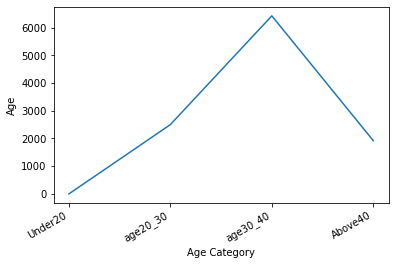

In [411]:
age_category = ["Under20", "age20_30","age30_40", "Above40" ]

age_number = [len(Under20.index), len(age20_30.index),len(age30_40.index), len(Above40.index)]

ages = np.array( age_number)

fig, ax = plt.subplots()
ax.plot(age_category, ages)
fig.autofmt_xdate()
plt.xlabel('Age Category')
plt.ylabel('Age')
plt.show()

# GET HOME AND AWAY TOTAL GOALS SCORED

In [297]:
df_home = pd.read_csv('home_team_matches.csv')
df_away = pd.read_csv('away_team_matches.csv')

In [298]:
df_home.head()

,home_team,season,stage,date,home_team_goal
0,KRC Genk,2008/2009,1,2008-08-17 00:00:00,1
1,SV Zulte-Waregem,2008/2009,1,2008-08-16 00:00:00,0
2,KSV Cercle Brugge,2008/2009,1,2008-08-16 00:00:00,0
3,KAA Gent,2008/2009,1,2008-08-17 00:00:00,5
4,FCV Dender EH,2008/2009,1,2008-08-16 00:00:00,1


In [299]:
df_away.head()

,away_team,season,stage,date,away_team_goal
0,Beerschot AC,2008/2009,1,2008-08-17 00:00:00,1
1,Sporting Lokeren,2008/2009,1,2008-08-16 00:00:00,0
2,RSC Anderlecht,2008/2009,1,2008-08-16 00:00:00,3
3,RAEC Mons,2008/2009,1,2008-08-17 00:00:00,0
4,Standard de Liège,2008/2009,1,2008-08-16 00:00:00,3


In [300]:
# Drop columns from away teams that we do not need and then join the dataframe
df_away.drop(['season', 'stage', 'date'], axis=1, inplace=True)

In [301]:
print(df_away.head())

           away_team  away_team_goal
0       Beerschot AC               1
1   Sporting Lokeren               0
2     RSC Anderlecht               3
3          RAEC Mons               0
4  Standard de Liège               3


In [302]:
# Join home and away teams
concantd = df_home.join(df_away)

In [303]:
concantd.head()

,home_team,season,stage,date,home_team_goal,away_team,away_team_goal
0,KRC Genk,2008/2009,1,2008-08-17 00:00:00,1,Beerschot AC,1
1,SV Zulte-Waregem,2008/2009,1,2008-08-16 00:00:00,0,Sporting Lokeren,0
2,KSV Cercle Brugge,2008/2009,1,2008-08-16 00:00:00,0,RSC Anderlecht,3
3,KAA Gent,2008/2009,1,2008-08-17 00:00:00,5,RAEC Mons,0
4,FCV Dender EH,2008/2009,1,2008-08-16 00:00:00,1,Standard de Liège,3


# HOW DID THE TEAMS FAIR AGAINST EACH OTHER

In [304]:
df_head_to_head = concantd.to_csv('head_to_head_matches.csv')

In [305]:
head_to_head = pd.read_csv('head_to_head_matches.csv')

In [306]:
head_to_head.describe()

,Unnamed: 0,stage,home_team_goal,away_team_goal
count,25979.000000,25979.000000,25979.000000,25979.000000
mean,12989.000000,18.242773,1.544594,1.160938
std,7499.635658,10.407354,1.297158,1.142110
min,0.000000,1.000000,0.000000,0.000000
25%,6494.500000,9.000000,1.000000,0.000000
50%,12989.000000,18.000000,1.000000,1.000000
75%,19483.500000,27.000000,2.000000,2.000000
max,25978.000000,38.000000,10.000000,9.000000


In [307]:
# Get total home scored goals
total_home_goals = head_to_head['home_team_goal'].sum()

In [308]:
total_home_goals

40127

In [309]:
# Get total away goals
total_away_goals = head_to_head['away_team_goal'].sum()

In [310]:
total_away_goals

30160

## GET TEAM'S MOST SCORED GOALS FOR A MATCH

In [355]:
home_head_to_head = pd.read_csv('head_to_head_matches.csv')
max_res = home_head_to_head.groupby('home_team')['home_team_goal'].max().reset_index()
max_res.columns = ['home_team', 'max_goal']
max_res.head()

,home_team,max_goal
0,1. FC Kaiserslautern,5
1,1. FC Köln,4
2,1. FC Nürnberg,5
3,1. FSV Mainz 05,5
4,AC Ajaccio,3


             home_team  max_goal
184                PSV        10
211     Real Madrid CF        10
49              Celtic         9
77    FC Bayern Munich         9
262  Tottenham Hotspur         9
51             Chelsea         8
75        FC Barcelona         8
162  Manchester United         8
232         SL Benfica         8
243        Southampton         8
['PSV' 'Real Madrid CF' 'Celtic' 'FC Bayern Munich' 'Tottenham Hotspur'
 'Chelsea' 'FC Barcelona' 'Manchester United' 'SL Benfica' 'Southampton']
[10 10  9  9  9  8  8  8  8  8]


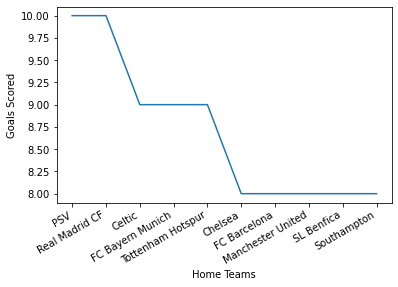

In [386]:
largest_ten= max_res.nlargest(10,'max_goal')
print(largest_ten)
largest_ten_teams = np.array(largest_ten['home_team'])
print(largest_ten_teams)
largest_ten_goals = np.array(largest_ten['max_goal'])
print(largest_ten_goals)
fig, ax = plt.subplots()
ax.plot(largest_ten_teams, largest_ten_goals)
fig.autofmt_xdate()
plt.xlabel('Home Teams')
plt.ylabel('Goals Scored')
plt.show()

In [312]:
max_res.to_csv('most_goals_per_team.csv')

GET TEAM'S LESS SCORED GOALS FOR A MATCH

In [313]:
away_head_to_head = pd.read_csv('head_to_head_matches.csv')
min_res = away_head_to_head.groupby('away_team')['away_team_goal'].min().reset_index()
min_res.columns = ['away_team', 'min_goal']
min_res.head()

,away_team,min_goal
0,1. FC Kaiserslautern,0
1,1. FC Köln,0
2,1. FC Nürnberg,0
3,1. FSV Mainz 05,0
4,AC Ajaccio,0


              away_team  min_goal
0  1. FC Kaiserslautern         0
1            1. FC Köln         0
2        1. FC Nürnberg         0
3       1. FSV Mainz 05         0
4            AC Ajaccio         0
5      AC Arles-Avignon         0
6         AC Bellinzona         0
7          ADO Den Haag         0
8            AJ Auxerre         0
9             AS Monaco         0
['1. FC Kaiserslautern' '1. FC Köln' '1. FC Nürnberg' '1. FSV Mainz 05'
 'AC Ajaccio' 'AC Arles-Avignon' 'AC Bellinzona' 'ADO Den Haag'
 'AJ Auxerre' 'AS Monaco']
[0 0 0 0 0 0 0 0 0 0]


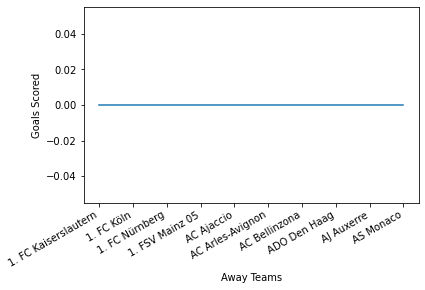

In [389]:
min_ten= min_res.nlargest(10,'min_goal')
print(min_ten)
min_ten_teams = np.array(min_ten['away_team'])
print(min_ten_teams)
min_ten_goals = np.array(min_ten['min_goal'])
print(min_ten_goals)
fig, ax = plt.subplots()
ax.plot(min_ten_teams, min_ten_goals)
fig.autofmt_xdate()
plt.xlabel('Away Teams')
plt.ylabel('Goals Scored')
plt.show()

In [314]:
min_res.to_csv('less_goals_per_team.csv')

## TEAMS THAT SCORED MOST GOALS

In [315]:
team_max_goals =  pd.read_csv('most_goals_per_team.csv')

In [316]:
team_max_goals[team_max_goals.max_goal == team_max_goals.max_goal.max()]

,Unnamed: 0,home_team,max_goal
184,184,PSV,10
211,211,Real Madrid CF,10


## TEAMS THAT SCORED LESS GOALS

In [317]:
team_min_goals =  pd.read_csv('less_goals_per_team.csv')

In [318]:
team_min_goals[team_min_goals.min_goal == team_min_goals.min_goal.min()]

,Unnamed: 0,away_team,min_goal
0,0,1. FC Kaiserslautern,0
1,1,1. FC Köln,0
2,2,1. FC Nürnberg,0
3,3,1. FSV Mainz 05,0
4,4,AC Ajaccio,0
...,...,...,...
291,291,Xerez Club Deportivo,0
292,292,Zagłębie Lubin,0
293,293,Zawisza Bydgoszcz,0
294,294,Évian Thonon Gaillard FC,0


 ## MATCHES WHERE HOME TEAMS  WON(AWAY TEAMS THAT LOST)

In [319]:
home_win_head_to_head = pd.read_csv('head_to_head_matches.csv')
teams_won = home_win_head_to_head[home_win_head_to_head['home_team_goal'] > home_win_head_to_head['away_team_goal']]
print(teams_won[teams_won.columns[0]].count())
teams_won.head()

11917


,Unnamed: 0,home_team,season,stage,date,home_team_goal,away_team,away_team_goal
3,3,KAA Gent,2008/2009,1,2008-08-17 00:00:00,5,RAEC Mons,0
8,8,KVC Westerlo,2008/2009,1,2008-08-16 00:00:00,1,Sporting Charleroi,0
9,9,Club Brugge KV,2008/2009,10,2008-11-01 00:00:00,4,KV Kortrijk,1
21,21,KSV Cercle Brugge,2008/2009,11,2008-11-07 00:00:00,2,SV Zulte-Waregem,0
25,25,KVC Westerlo,2008/2009,11,2008-11-08 00:00:00,1,KRC Genk,0


In [320]:
teams_won.to_csv('win_teams.csv')

## MATCHES WHERE HOME TEAMS LOST(AWAY TEAMS THAT WON)

In [321]:
away_win_head_to_head = pd.read_csv('head_to_head_matches.csv')
teams_lost = away_win_head_to_head[away_win_head_to_head['home_team_goal'] < away_win_head_to_head['away_team_goal']]
print(teams_lost[teams_lost.columns[0]].count())
teams_lost.head()

7466


,Unnamed: 0,home_team,season,stage,date,home_team_goal,away_team,away_team_goal
2,2,KSV Cercle Brugge,2008/2009,1,2008-08-16 00:00:00,0,RSC Anderlecht,3
4,4,FCV Dender EH,2008/2009,1,2008-08-16 00:00:00,1,Standard de Liège,3
7,7,Tubize,2008/2009,1,2008-08-16 00:00:00,1,Royal Excel Mouscron,2
10,10,Standard de Liège,2008/2009,10,2008-10-31 00:00:00,1,Sporting Charleroi,2
11,11,SV Zulte-Waregem,2008/2009,10,2008-11-02 00:00:00,0,KAA Gent,2


In [322]:
teams_lost.to_csv('loss_teams.csv')

## TEAMS THAT DREW(NO TEAM WON)

In [323]:
draw_head_to_head = pd.read_csv('head_to_head_matches.csv')
teams_draw = draw_head_to_head[draw_head_to_head['home_team_goal'] == draw_head_to_head['away_team_goal']]
print(teams_draw[teams_draw.columns[0]].count())
teams_draw.head()

6596


,Unnamed: 0,home_team,season,stage,date,home_team_goal,away_team,away_team_goal
0,0,KRC Genk,2008/2009,1,2008-08-17 00:00:00,1,Beerschot AC,1
1,1,SV Zulte-Waregem,2008/2009,1,2008-08-16 00:00:00,0,Sporting Lokeren,0
5,5,KV Mechelen,2008/2009,1,2008-09-24 00:00:00,1,Club Brugge KV,1
6,6,KSV Roeselare,2008/2009,1,2008-08-16 00:00:00,2,KV Kortrijk,2
12,12,Sporting Lokeren,2008/2009,10,2008-11-01 00:00:00,0,RAEC Mons,0


In [324]:
teams_draw.to_csv('draw_teams.csv')

## HOME TEAM SEASONAL PERFORMANCE

In [325]:
season_head_to_head = pd.read_csv('head_to_head_matches.csv')
home_teams_per_season_max = season_head_to_head.groupby(['home_team', 'season'])['home_team_goal'].max().reset_index()
home_teams_per_season_min = season_head_to_head.groupby(['home_team', 'season'])['home_team_goal'].min().reset_index()
print(home_teams_per_season_max.head())
home_teams_per_season_min.head()

              home_team     season  home_team_goal
0  1. FC Kaiserslautern  2010/2011               5
1  1. FC Kaiserslautern  2011/2012               3
2            1. FC Köln  2008/2009               2
3            1. FC Köln  2009/2010               3
4            1. FC Köln  2010/2011               4


,home_team,season,home_team_goal
0,1. FC Kaiserslautern,2010/2011,0
1,1. FC Kaiserslautern,2011/2012,0
2,1. FC Köln,2008/2009,0
3,1. FC Köln,2009/2010,0
4,1. FC Köln,2010/2011,0


## AWAY TEAM SEASONAL PERFORMANCE

In [326]:
season_away_head_to_head = pd.read_csv('head_to_head_matches.csv')
away_teams_per_season_max = season_away_head_to_head.groupby(['away_team', 'season'])['away_team_goal'].max().reset_index()
away_teams_per_season_min = season_away_head_to_head.groupby(['away_team', 'season'])['away_team_goal'].min().reset_index()
print(away_teams_per_season_max.head())
print(away_teams_per_season_min.head())

              away_team     season  away_team_goal
0  1. FC Kaiserslautern  2010/2011               4
1  1. FC Kaiserslautern  2011/2012               2
2            1. FC Köln  2008/2009               3
3            1. FC Köln  2009/2010               4
4            1. FC Köln  2010/2011               2
              away_team     season  away_team_goal
0  1. FC Kaiserslautern  2010/2011               0
1  1. FC Kaiserslautern  2011/2012               0
2            1. FC Köln  2008/2009               0
3            1. FC Köln  2009/2010               0
4            1. FC Köln  2010/2011               0


# TEAMS THAT PLAYED EACH OTHER SEASONALY

## HOME TEAM SEASONAL PERFORMANCE

In [327]:
#Club's seasonal games against other teams
home_season_head_to_head = pd.read_csv('head_to_head_matches.csv')
seasonal_games = home_season_head_to_head.groupby(['home_team', 'away_team', 'season', 'home_team_goal', 'away_team_goal'])['home_team_goal', 'away_team_goal'].apply(list)
print(seasonal_games.head())
seasonal_games.to_csv('seasonal_games.csv')

/tmp/ipykernel_5044/962016489.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  seasonal_games = home_season_head_to_head.groupby(['home_team', 'away_team', 'season', 'home_team_goal', 'away_team_goal'])['home_team_goal', 'away_team_goal'].apply(list)


home_team             away_team        season     home_team_goal  away_team_goal
1. FC Kaiserslautern  1. FC Köln       2010/2011  1               1                 [home_team_goal, away_team_goal]
                                       2011/2012  0               1                 [home_team_goal, away_team_goal]
                      1. FC Nürnberg   2010/2011  0               2                 [home_team_goal, away_team_goal]
                                       2011/2012  0               2                 [home_team_goal, away_team_goal]
                      1. FSV Mainz 05  2010/2011  0               1                 [home_team_goal, away_team_goal]
dtype: object


In [328]:
# CLub's summary home and way basing on season and totals
away_season_head_to_head = pd.read_csv('head_to_head_matches.csv')
home_seasonal_games = away_season_head_to_head.groupby(['home_team', 'season'])['home_team_goal'].sum().reset_index(name='total_home_goals')
away_seasonal_games = away_season_head_to_head.groupby(['away_team', 'season'])['away_team_goal'].sum().reset_index(name='total_away_goals')
print(home_seasonal_games.head())
print(away_seasonal_games.head())

              home_team     season  total_home_goals
0  1. FC Kaiserslautern  2010/2011                25
1  1. FC Kaiserslautern  2011/2012                12
2            1. FC Köln  2008/2009                14
3            1. FC Köln  2009/2010                18
4            1. FC Köln  2010/2011                30
              away_team     season  total_away_goals
0  1. FC Kaiserslautern  2010/2011                23
1  1. FC Kaiserslautern  2011/2012                12
2            1. FC Köln  2008/2009                21
3            1. FC Köln  2009/2010                15
4            1. FC Köln  2010/2011                17


## TOTAL GOALS PER SEASON FOR EACH CLUB

In [329]:
home_seasonal_games['TotalGoals'] = home_seasonal_games['total_home_goals'] + away_seasonal_games['total_away_goals']
print(home_seasonal_games.head())
home_seasonal_games.to_csv('total_goals_per_season.csv')

              home_team     season  total_home_goals  TotalGoals
0  1. FC Kaiserslautern  2010/2011                25          48
1  1. FC Kaiserslautern  2011/2012                12          24
2            1. FC Köln  2008/2009                14          35
3            1. FC Köln  2009/2010                18          33
4            1. FC Köln  2010/2011                30          47


In [392]:
# MAXIMUM GOALS SCORED BY A TEAM IN ALL SEASONS
maxim_goals = pd.read_csv('total_goals_per_season.csv')
print(maxim_goals.describe())
maxim_goals_scored = maxim_goals['TotalGoals'].max()
maxim_goals_scored

        Unnamed: 0  total_home_goals   TotalGoals
count  1478.000000       1478.000000  1478.000000
mean    738.500000         27.149526    47.555480
std     426.806162          9.681661    15.895455
min       0.000000          3.000000     5.000000
25%     369.250000         21.000000    37.000000
50%     738.500000         25.000000    45.000000
75%    1107.750000         32.000000    55.000000
max    1477.000000         73.000000   121.000000


121

### WHICH TEAM SCORED MOST GOALS

In [393]:
# Team with most goals
maxim_goals[maxim_goals['TotalGoals'] == maxim_goals['TotalGoals'].max()]

,Unnamed: 0,home_team,season,total_home_goals,TotalGoals
1047,1047,Real Madrid CF,2011/2012,70,121


# WHAT TEAM SCORED MOST HOME GOALS

In [332]:
# Team with most home goals
maxim_goals[maxim_goals['total_home_goals'] == maxim_goals['total_home_goals'].max()]

,Unnamed: 0,home_team,season,total_home_goals,TotalGoals
352,352,FC Barcelona,2011/2012,73,114


### HOW MANY AND WHAT CATEGORIES FOR SEASONS ARE THERE?

In [333]:
season_categories = pd.read_csv('head_to_head_matches.csv')
categories = season_categories['season'].astype('category')
categories

0        2008/2009
1        2008/2009
2        2008/2009
3        2008/2009
4        2008/2009
           ...    
25974    2015/2016
25975    2015/2016
25976    2015/2016
25977    2015/2016
25978    2015/2016
Name: season, Length: 25979, dtype: category
Categories (8, object): ['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016']

### HOW MANY AND WHAT CATEGORIES FOR STAGES ARE THERE?

In [334]:
stage_categories = pd.read_csv('head_to_head_matches.csv')
categories = stage_categories['stage'].astype('category')
categories

0        1
1        1
2        1
3        1
4        1
        ..
25974    9
25975    9
25976    9
25977    9
25978    9
Name: stage, Length: 25979, dtype: category
Categories (38, int64): [1, 2, 3, 4, ..., 35, 36, 37, 38]

# CONCLUSION

In [ ]:
1. Many players are between 30 and 40 years
2. PSV and Madrid scored most goals for a single match
3. Most teams have played games with no goal scored